# [LINMA1702] Localisation optimale des capacités de production élionnes en Europe 
##### <center> *Ansotte Justin | Belpaire Victor | Charles Benjamin*

# **A. Introduction**

Ce projet a pour objectif d'étudier un nouveau modèle européen de la production d'électricité se reposant significativement (et de la manière la plus optimale) sur l'énergie éolienne. Les sites éoliens étudiés seront soit *onshore* soit *offshore*.

# **Partie 1. Analyse d'un modèle européen intégré**

## *1.1 Formulation du problème sous la forme d'un modèle d'optimisation linéaire*

**Variables :** 
- $x_{i}$ = puissance attribuée au site i.
- $t_{j}$ = variables introduites pour formuler la contrainte de variabilité de manière linéaire.


**Constantes :**
- $P$ = puissance totale installée
- $\kappa$ = fraction de la puissance installée offshore
- $\delta$ = fraction de la puissance installée qui sert de borne supérieure pour la variabilitée


**contraintes :**
- $\sum_{i=1}^{642} x_i = P$ 
- $0 \leq x_i \leq c_{i}$  pour tout $i \in \{1,\dots,642\}$.
- $\sum_{i=1}^{642} a_i x_i = \kappa P$
- $ -t \leq M R x \leq t$
- $\sum_{i=1}^{(8760/T) -1} t_i \leq T \delta P ((8760 / T) - 1)$

La première contrainte signifie que la puissance totale installée soit égale au paramètre $P$ donné.
<br>
La deuxième impose que la puissance attribuée au site $i$ soit comprise entre 0 et la capacité maximale du site $i$.
<br>
$c_i$ est donc la i-ème composante du vecteur $c$ qui contient les capacités maximales des différents sites.
<br>
La troisième impose qu'une proportion $\kappa$ de la puissance totale $P$ soit attribuée a des sites offshores. La i-ème composante du vecteur $a$ est définie comme étant égale à 1 si le site $i$ est un site offshore ou égale à 0 sinon.
<br>
La quatrième et dernière contrainte impose que la variabilité moyenne définie comme étant la valeur moyenne des différences (prises en valeur absolue) de production totale effective entre deux périodes (de $T$ heures) consécutives, soit maintenue sous une certaine valeur maximale.
<br>
La matrice $R$ est une matrice de taille $8760$ par $642$ et définie telle que la composante $r_{ji}$ soit égale au rendement du site $i$ durant l'heure $j$. De cette manière si on multiplie $R$ par $x$ on obtient un vecteur $e$ de taille 8760. La i-ème composante de $e$ représente la production totale d'énergie durant l'heure $i$. 

\begin{equation*}
Rx = \begin{pmatrix}
r_{1,1} & r_{1,1} & \cdots & r_{1,642} \\
r_{2,1} & r_{2,2} & \cdots & r_{2,642} \\
\vdots  & \vdots  & \ddots & \vdots  \\
r_{8760,1} & r_{8760,2} & \cdots & r_{8760,642} 
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots\\
x_{642}
\end{pmatrix}
=\begin{pmatrix}
e_{1}\\
e_{2}\\
\vdots\\
e_{8760}
\end{pmatrix}
\end{equation*}

La matrice $M$ nous permet de combiner ces énergies. La taille de la matrice $M$ est de $8760/T-1$ par $8760$, le nombre de ligne dépend de la période $T$ utilisée dans la définition de la variabilité.
Prenons comme exemple le cas ou $T = 3$, on obtient:

\begin{equation*}
Me = \begin{pmatrix}
1 & 1 & 1 & -1 & -1 & -1 & 0  &  0 &  0  & \cdots & 0 &0 & 0\\
0 & 0 & 0 &  1 & 1  & 1  & -1 & -1 & -1  & \cdots & 0 &0 & 0\\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  &\vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots & -1 & -1 & -1\\
\end{pmatrix}
\begin{pmatrix}
e_{1}\\
e_{2}\\
\vdots\\
e_{8760}
\end{pmatrix}
=\begin{pmatrix}
e_{1} + e_{2} + e_{3} - e_{4} - e_{5} - e_{6} \\
e_{4} + e_{5} + e_{6} - e_{7} - e_{8} - e_{9} \\
\vdots \\
e_{8755} + e_{8756} + e_{8757} - e_{8758} - e_{8759} - e_{8760}
\end{pmatrix}
\end{equation*}

La i-ème ligne de la matrice $M$ contient donc $T$ fois le nombre 1 à la position $(i - 1)T + 1$ jusqu'à la position 
$(i - 1)T + T$  et $T$ fois le nombre -1 au $T$ indices suivants. Les autres éléments de la ligne valent 0.
La définition donnée pour la contrainte de variabilité nous disait que la moyenne de la somme des valeurs absolues des composantes du vecteur $Me = E$ devait être bornée par $\delta TP$.
<br>

$\frac{1}{8760/T - 1}(|E_{1}| + |E_{2}| + \cdots + |E_{8760/T - 1}|) \leq \delta TP $

<br>
Où $E_i$ correspond a la i-ème composante du vecteur $E$.
Pour transformer cette contrainte en une contrainte linéaire nous avons introduit les variables $t_j$. A chaque valeur absolue dans notre somme correspond une variable. En posant que $|E_{j}| \leq t_{j}$ ce qui revient a dire que 
$-t_j \leq E_{j} \leq t_j$ on transforme ainsi notre contrainte non linéaire en contrainte linéaire sans pour autant avoir modifier le problème car a l'optimum la contrainte sera serrée et donc $|E_{j}|$ sera égale à $t_{j}.$



**Fonction objectif :**

- maximum $ \sum_{i=1}^{642}\sum_{j=1}^{8760} x_i r_{ij}$

ou $r_{ij}$ représente le rendement du site $i$ durant l'heure $j$.
On cherche donc a maximiser l'énergie totale produite par les éoliennes au cours d'une année.

**Notes :**

Dans tout ce qui a été décrit précedemment, 8760 représente le nombre d'heures considérées.On peut sans aucun problème remplacer 8760 par un autre nombre entier plus petit et divisible par $T$. On obtient alors un problème qui ne prend en compte que les $N$ premières heures, ce qui nous donne un problème moins contraint et donc plus facile a résoudre.



###  *Estimation de la taille du problème*

Seul le nombre de sites que l'on prend dans notre modèle a une influence sur le nombre de variable $x_{i}$. Le nombre de variables $t_{j}$ dépend quant à lui du nombre d'heures considérées. Si $N$ est le nombre d'heures considéré on a que le nombre de variables est égale à $N/T-1$.  
En résumé si $X$ est le nombre de site, $N$ le nombre d'heures considérées et $T$ le pas de temps on a $X + N/T - 1$ variables.

Une analyse similaire nous donne que le nombre de contraintes est égal à $2 + X + N/T$


## *1.2 Résolution du problème*

In [4]:
import numpy as np
from cylp.cy import CyClpSimplex
from cylp.py.modeling.CyLPModel import CyLPModel, CyLPArray
import pandas as pd
import time
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [5]:
# quelques fonctions

def matrix_sum_periods(N, T):
    M = np.zeros((N//T, N))
    for i in range(N//T):
        M[i, i*T:(i+1)*T] = ([1] * T)
    
    return np.matrix(M)

def var_matrix(n):
    M = np.zeros((n-1, n))
    for i in range(n-1):
        M[i,i] = 1
        M[i,i+1] = -1
    return np.matrix(M)

def matrix_rendement(rend_off, rend_on, sites):
    lignes = len(rend_off)
    colonnes = len(rend_off[0])
    
    M = np.empty((lignes, colonnes))
    for i, site in sites.iterrows():
        if site['capacite offshore'] == 'Oui':
            M[i] = rend_off[i]
        else:
            M[i] = rend_on[i]
    
    return np.matrix(M)

def sum_rendement(rend, nb_site):
    sum_rend = np.sum(rend, axis=1)
    c = np.ndarray((nb_site,))
    for i in range(nb_site):
        c[i] = sum_rend[i,0]
    c = CyLPArray(c)
    return c

In [6]:
# chargement des données

nb_site = 642


sites = pd.read_csv('data/Sites.csv')
sites = sites.sort_values('index site')
sites = sites.reset_index()
capacites = sites['capacites'].copy()
capacites = CyLPArray(capacites)


off_cap = sites['capacite offshore']
off_cap = off_cap.replace('Oui', 1)
off_cap = off_cap.replace('Non', 0)
off_cap = CyLPArray(off_cap)


rend_off_entire = np.genfromtxt('data/Rendements_offshore.csv', delimiter=',')
rend_on_entire = np.genfromtxt('data/Rendements_onshore.csv', delimiter=',')

### 1.2.1 Résolution

In [7]:
# fonction de résolution

def resolution(N, T, P, d, k, verbose=True):

    rend_off = rend_off_entire[:,:N]
    rend_on = rend_on_entire[:,:N]


    rend = matrix_rendement(rend_off, rend_on, sites) # (642, N)


    variabilitee = var_matrix(N//T) @ matrix_sum_periods(N, T) # (N/T-1, N/T) @ (N/T , N)


    model = CyLPModel()
    x = model.addVariable('x', nb_site)
    t = model.addVariable('t', (N-1)//T)


    sum_t = CyLPArray(np.ones(((N-1)//T,), dtype = int))
    sum_x = CyLPArray(np.ones((nb_site,), dtype=int))


    model.addConstraint(sum_x * x == P, 'puissance totale')
    model.addConstraint(0 <= x <= capacites, 'capacitee')
    model.addConstraint(off_cap * x == (k*P), 'puissance offshore')
    model.addConstraint((variabilitee @ rend.T) * x - t <= 0, 'variabilitee pp')
    model.addConstraint((variabilitee @ rend.T) * x + t >= 0, 'variabilitee pg') 
    model.addConstraint(sum_t * t <= (d*P*T*(N//T - 1)), 'somme variabilitee')


    c = sum_rendement(rend, nb_site)
    model.objective = -c * x 


    s = CyClpSimplex(model)


    start = time.time()
    result = s.dual()
    end = time.time()
    
    if verbose:
        print("résolution:", result)
    
    return s, (end-start), rend

In [8]:
N = 244*3
T = 3
P = 500000
d = 0.02
k = 0.17


s, time_taken, rend = resolution(N, T, P, d, k)


sol = s.primalVariableSolution['x']
sol_t = s.primalVariableSolution['t']

résolution: optimal


### 1.2.2 Commentaires sur la résolution

In [19]:
sol_sum_t = 0
for e in sol_t:
    sol_sum_t += e   


print("N = {}\nP = {}\nT = {}\nd = {}\nk = {}\n".format(N, P, T, d, k))

print("Variabilitée moyenne: {:.2f} MWh ({})".format(sol_sum_t/(N//T - 1), "OK" if abs(sol_sum_t/(N//T - 1) - d*P*T) <= 1e-3 else "NOT OK"))

print("Puissance installée totale: {:.0f} MW ({})".format(np.sum(sol), "OK" if abs(np.sum(sol) - P) < 1e-3 else "NOT OK"))

print("Puissance installée offshore: {:.0f} MW ({})".format(np.dot(np.array(off_cap), sol), "OK" if abs(np.dot(np.array(off_cap), sol) - k*P) < 1e-3 else "NOT OK"))

print("Production d'energie totale: {:.0f} GWh".format(-s.objectiveValue/1000))

print("Rendement moyen: {:.2f}%".format(-s.objectiveValue/(P*N)*100))

print("Temps de résolution: {:.0f} min {:.3f} sec".format(time_taken//60, time_taken % 60))

N = 732
P = 500000
T = 3
d = 0.02
k = 0.17

Variabilitée moyenne: 30000.00 MWh (OK)
Puissance installée totale: 500000 MW (OK)
Puissance installée offshore: 85000 MW (OK)
Production d'energie totale: 192645 GWh
Rendement moyen: 52.64%
Temps de résolution: 0 min 0.497 sec


### 1.2.3 Affichage des résultats sur la carte

In [18]:
text_fig = ["puissance: {:.1f}MW, {:.1f}% de la capacitée (i={})".format(
    sol[i], sol[i]/sites['capacites'][i]*100, sites['index site'][i]) for i in range(len(sol))]

fig_sol = go.Figure(data=go.Scattergeo(
        lon = sites['longitude'],
        lat = sites['latitude'],
        text = text_fig,
        mode = 'markers',
        marker = dict(size = sol/sol.max()*30)
    ))

fig_sol.update_layout(
        title = 'Puissance installée sur chaque site',
        geo_scope = 'europe'
    )

fig_sol.show()

### 1.2.4 Graphe production d'énergie en fonction du temps

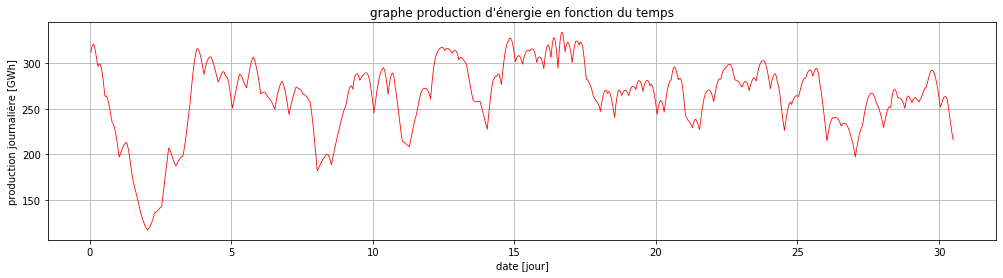

In [17]:
energie = np.array(rend.T).dot(sol)/1000
x_graph = np.arange(1,N+1,1)/24

plt.figure(figsize=(17,4))
plt.plot(x_graph, energie, '-r', linewidth=0.8)
plt.xlabel('date [jour]')
plt.ylabel('production journalière [GWh]')
plt.title('graphe production d\'énergie en fonction du temps')
plt.grid(True)

plt.show()

### 1.2.5 Graphe du temps d'éxecution en fonction de la quantité de donnée

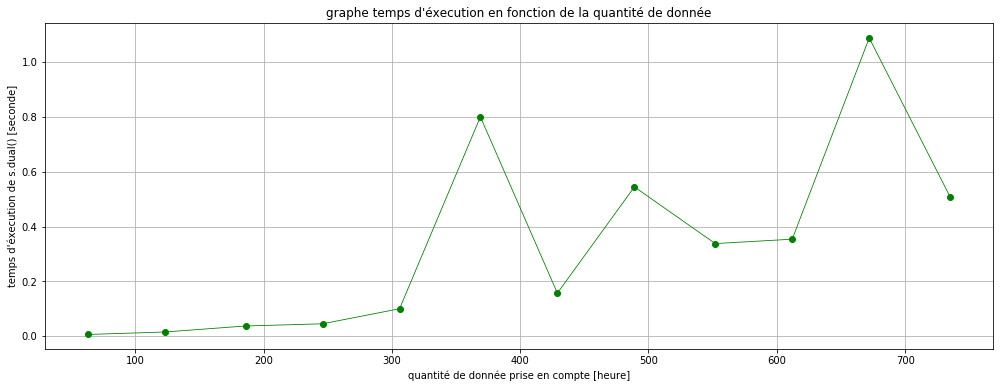

In [16]:
N = 244*3
T = 3
P = 500000
d = 0.02
k = 0.17

temps_exec = []
N_vector = np.array([(i+1)*N//12 for i in range(12)])


for i in range(len(N_vector)): # vérifie que chaque N soit divisible par 3
    e = N_vector[i]
    e += T - (e%T)
    N_vector[i] = e
    

for N_ in N_vector:    
    temps_exec.append(resolution(N_, T, P, d, k, verbose=False)[1])


plt.figure(figsize=(17,6))
plt.plot(N_vector, temps_exec, '-og', linewidth=0.8)
plt.xlabel('quantité de donnée prise en compte [heure]')
plt.ylabel('temps d\'éxecution de s.dual() [seconde]')
plt.title('graphe temps d\'éxecution en fonction de la quantité de donnée')
plt.grid(True)
plt.show()

## *1.3 Paramètres à changer*

In [13]:
print(s.dualConstraintSolution['variabilitee pp'])
print(s.dualConstraintSolution['variabilitee pg'])


# wtfff....
# toutes les valeurs sont les même..

[-0.0548771 -0.0548771 -0.0548771 -0.0548771 -0.0548771 -0.0548771
 -0.0548771 -0.0548771  0.        -0.0548771 -0.0548771 -0.0548771
 -0.0548771 -0.0548771 -0.0548771 -0.0548771  0.         0.
  0.         0.         0.         0.        -0.0548771 -0.0548771
  0.         0.         0.         0.         0.         0.
 -0.0548771 -0.0548771  0.        -0.0548771 -0.0548771 -0.0548771
  0.        -0.0548771 -0.0548771 -0.0548771  0.         0.
 -0.0548771  0.         0.         0.        -0.0548771 -0.0548771
 -0.0548771 -0.0548771 -0.0548771  0.         0.         0.
 -0.0548771 -0.0548771  0.         0.        -0.0548771 -0.0548771
 -0.0548771 -0.0548771 -0.0548771 -0.0548771  0.         0.
 -0.0548771 -0.0548771  0.         0.         0.         0.
  0.         0.         0.        -0.0548771  0.        -0.0548771
 -0.0548771 -0.0548771  0.         0.        -0.0548771 -0.0548771
  0.        -0.0548771 -0.0548771 -0.0548771 -0.0548771  0.
  0.         0.         0.         0.       

## *1.4 Résolution avec P variable*

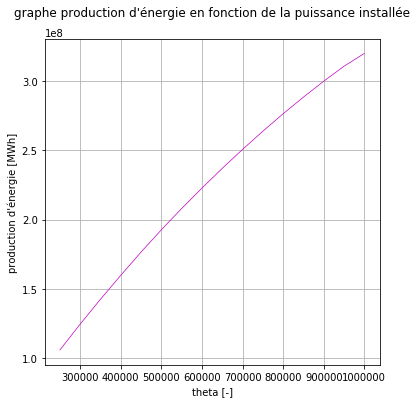

In [15]:
N = 244*3
T = 3
P = 500000
d = 0.02
k = 0.17

thetas = np.arange(0.5, 2.1, 0.1)
productions = []

for theta in thetas:
    si = resolution(N, T, P*theta, d, k, verbose=False)[0]
    productions.append(-si.objectiveValue)


plt.figure(figsize=(6,6))
plt.plot(thetas*P, productions, '-m', linewidth=0.7)
plt.xlabel('theta [-]')
plt.ylabel('production d\'énergie [MWh]')
plt.title('graphe production d\'énergie en fonction de la puissance installée', y=1.05)
plt.grid(True)
plt.show()

## *1.5 Quelques variantes*

### *1.5.1 Borne supérieur sur P*

In [12]:
# fonction de résolution pour la variante avec puissance bornée

def resolution_P_bounded(N, T, P, d, k, verbose=True):
    
    rend_off = rend_off_entire[:,:N]
    rend_on = rend_on_entire[:,:N]


    rend = matrix_rendement(rend_off, rend_on, sites) # (642, N)


    variabilitee = var_matrix(N//T) @ matrix_sum_periods(N, T) # (N/T-1, N/T) @ (N/T , N)


    model = CyLPModel()
    x = model.addVariable('x', nb_site)
    t = model.addVariable('t', (N-1)//T)


    sum_t = CyLPArray(np.ones(((N-1)//T,), dtype = int))
    sum_x = CyLPArray(np.ones((nb_site,), dtype=int))


    model.addConstraint(sum_x * x <= P, 'puissance totale')
    model.addConstraint(0 <= x <= capacites, 'capacitee')
    model.addConstraint(off_cap * x == (k*P), 'puissance offshore')
    model.addConstraint((variabilitee @ rend.T) * x - t <= 0, 'variabilitee pp')
    model.addConstraint((variabilitee @ rend.T) * x + t >= 0, 'variabilitee pg') 
    model.addConstraint(sum_t * t <= (d*P*T*(N//T - 1)), 'somme variabilitee')


    c = sum_rendement(rend, nb_site)
    model.objective = -c * x 


    s = CyClpSimplex(model)


    start = time.time()
    result = s.dual()
    end = time.time()
    
    if verbose:
        print("résolution:", result)
    
    return s, (end-start), rend

In [13]:
N = 244*3
T = 3
P = 500000
d = 0.02
k = 0.17

si = resolution_P_bounded(N, T, P, d, k, verbose=False)[0]

sol = si.primalVariableSolution['x']

print("Puissance totale installée: {:.2f}".format(np.sum(sol)))

Puissance totale installée: 500000.00


On peut constater que changer la contrainte de puissance totale installée d'une égalité à une inégalité ne change pas le résultat puisque la somme de toutes les puissances installées sur chaque site vaut toujours $P = 500000$ MW.
La raison est simple à comprendre, TODO

### *1.5.2 Variabilitée maximale*

In [20]:
# fonction de résolution avec variabilitée maximale

def resolution_var_max(N, T, P, d, k, verbose=True):
    
    rend_off = rend_off_entire[:,:N]
    rend_on = rend_on_entire[:,:N]


    rend = matrix_rendement(rend_off, rend_on, sites) # (642, N)


    variabilitee = var_matrix(N//T) @ matrix_sum_periods(N, T) # (N/T-1, N/T) @ (N/T , N)


    model = CyLPModel()
    x = model.addVariable('x', nb_site)
    t = model.addVariable('t', (N-1)//T)


    sum_x = CyLPArray(np.ones((nb_site,), dtype=int))


    model.addConstraint(sum_x * x == P, 'puissance totale')
    model.addConstraint(0 <= x <= capacites, 'capacitee')
    model.addConstraint(off_cap * x == (k*P), 'puissance offshore')
    model.addConstraint((variabilitee @ rend.T) * x - t <= 0, 'variabilitee pp')
    model.addConstraint((variabilitee @ rend.T) * x + t >= 0, 'variabilitee pg') 
    model.addConstraint(t <= (d*P*T), 'variabilitee max')


    c = sum_rendement(rend, nb_site)
    model.objective = -c * x 


    s = CyClpSimplex(model)


    start = time.time()
    result = s.dual()
    end = time.time()
    
    if verbose:
        print("résolution:", result)
    
    return s, (end-start), rend

On résout ici le problème en ne prennant que des périodes de 1 heure pour que de heure en heure la différence de production d'énergie soit inférieur ou égal à $\delta P$.

In [68]:
N = 244*3
T = 1
P = 500000
d = 0.02
k = 0.17

si = resolution_var_max(N, T, P, d, k, verbose=False)[0]

sol_var_max = si.primalVariableSolution['x']
sol_t_var_max = si.primalVariableSolution['t']


print("Variabilitée max: {:.2f} MWh ({})".format(sol_t_var_max.max(), "OK" if abs(sol_t_var_max.max() - d*P*T) <= 1e-3 else "NOT OK"))

print("Production d'energie totale: {:.0f} GWh".format(-si.objectiveValue/1000))

print("Rendement moyen: {:.2f}%".format(-si.objectiveValue/(P*N)*100))

Variabilitée max: 10000.00 MWh (OK)
Production d'energie totale: 187586 GWh
Rendement moyen: 51.25%


On voit bien ci-dessus que la variabilitée maximale vaut $10000$MWh ce qui correspond bien à $\delta P$.

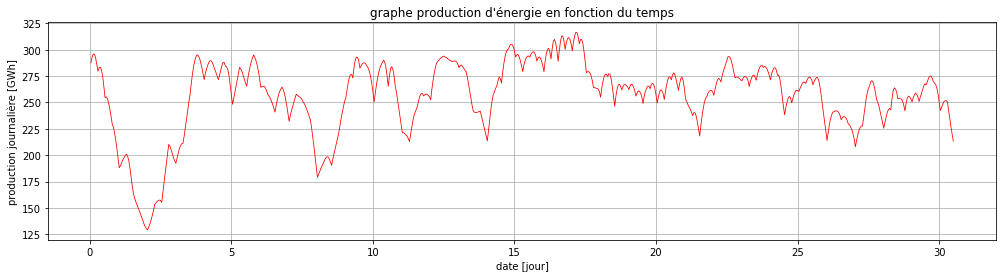

In [69]:
# plot energie avec variabilitée max en fonction du temps

energie = np.array(rend.T).dot(sol_var_max)/1000
x_graph = np.arange(1,N+1,1)/24

plt.figure(figsize=(17,4))
plt.plot(x_graph, energie, '-r', linewidth=0.8)
plt.xlabel('date [jour]')
plt.ylabel('production journalière [GWh]')
plt.title('graphe production d\'énergie en fonction du temps')
plt.grid(True)

plt.show()

### *1.5.3 Problème avec écrêtement*